In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img  # Import load_img function
from sklearn.model_selection import train_test_split


data_path=r'C:\Users\ASUS USER\Desktop\New folder (4)\dataset\train'

categories=os.listdir(data_path) ## list the files in that direction
print(categories) 
labels=np.arange(len(categories))
print(labels)
labels_dict=dict(zip(categories,labels))
print(labels_dict)


['cats', 'Dogs']
[0 1]
{'cats': 0, 'Dogs': 1}


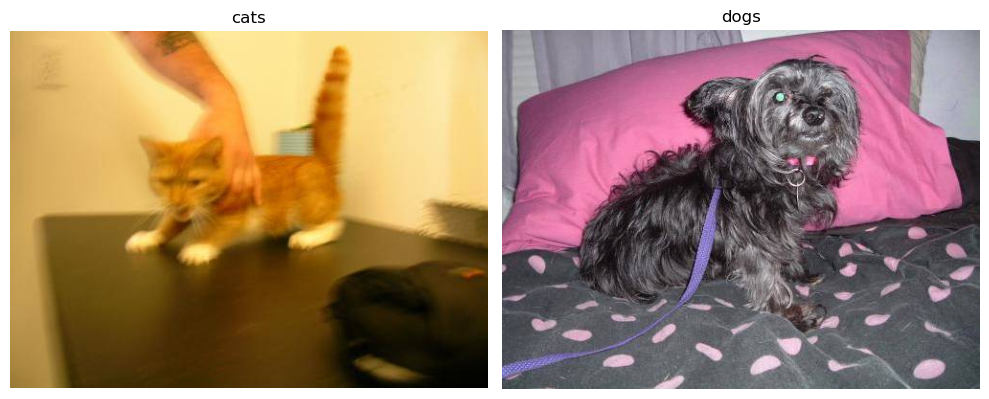

In [46]:
import matplotlib.pyplot as plt
import cv2
import os

# Assuming data_path contains the path to the directory containing subdirectories for each class
data_path = r'C:\Users\ASUS USER\Desktop\New folder (4)\dataset\train'

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Iterate over the classes
for idx, class_name in enumerate(['cats', 'dogs']):
    class_dir = os.path.join(data_path, class_name)  # Directory for the current class
    files = os.listdir(class_dir)
    if files:  # Check if there are files in the directory
        img_path = os.path.join(class_dir, files[0])  # Path to the first image in the class directory
        image = cv2.imread(img_path)  # Read the image using cv2
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        axes[idx].imshow(image)
        axes[idx].axis('off')
        axes[idx].set_title(class_name)

plt.tight_layout()
plt.show()


In [18]:
# from PIL import Image
# import os
# import matplotlib.pyplot as plt

# # Path to the directory containing subdirectories with images
# directory = r'C:\Users\ASUS USER\Desktop\New folder (4)\dataset\train'

# # Create a figure and axis objects
# fig, axs = plt.subplots(2, 5, figsize=(15, 6))

# # Iterate through the subdirectories ('cats' and 'dogs')
# for idx, subdir in enumerate(['cats', 'dogs']):
#     subdir_path = os.path.join(directory, subdir)
    
#     # Get list of files in the subdirectory
#     files = [f for f in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, f))]

#     # Iterate through the first 10 files in the subdirectory
#     for i in range(10):
#         if i < len(files):
#             file_path = os.path.join(subdir_path, files[i])
#             try:
#                 # Open and display the image
#                 image = Image.open(file_path)
#                 ax = axs[idx, i]
#                 ax.imshow(image)
#                 ax.axis('off')  # Turn off axis labels
#             except Exception as e:
#                 print(f"Error opening image {file_path}: {e}")
#         else:
#             print(f"There are fewer than 10 images in the '{subdir}' subdirectory.")
#             break

# plt.tight_layout()
# plt.show()


In [47]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img  # Import load_img function
from sklearn.model_selection import train_test_split
img_height = 300
img_width = 300
def load_images_and_labels(data_path, categories, labels_dicts, img_height, img_width):
    images = []
    labels = []
    for category in categories:
        folder_path = os.path.join(data_path, category)
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            try:
                img = load_img(img_path, target_size=(img_height, img_width))
                img_array = img_to_array(img)
                images.append(img_array)
                labels.append(labels_dict[category])
            except Exception as e:
                print(f"Error loading image '{img_path}': {e}")
    return np.array(images), np.array(labels)

# Example usage
images, labels = load_images_and_labels(data_path, categories, labels_dict, img_height, img_width)
#print(images)
#print(labels)


In [48]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.1, random_state=42)

In [49]:
# Normalize the images
X_train = X_train / 255.0
X_val = X_val / 255.0


In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# No augmentation for validation set, only rescale
val_datagen = ImageDataGenerator()

# Apply the data augmentation
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)

# Verify the generators
print("Training data shape: ", X_train.shape)
print("Validation data shape: ", X_val.shape)
print("Training labels shape: ", y_train.shape)
print("Validation labels shape: ", y_val.shape)


Training data shape:  (585, 300, 300, 3)
Validation data shape:  (65, 300, 300, 3)
Training labels shape:  (585,)
Validation labels shape:  (65,)


In [51]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation , BatchNormalization
from keras.layers import Conv2D , MaxPool2D , Flatten , Dropout, Dense, Activation, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers,models





def build_cnn_model(no_of_filters, size_of_filters, activation_function,number_of_neurons_in_the_dense_layer):
    model = Sequential()
    model.add(Conv2D(no_of_filters[0], size_of_filters[0],input_shape=(300,300,3),activation=activation_function[0]))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(no_of_filters[1], size_of_filters[1],activation=activation_function[1]))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(no_of_filters[2], size_of_filters[2],activation=activation_function[2]))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(no_of_filters[3], size_of_filters[3],activation=activation_function[3]))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(no_of_filters[4], size_of_filters[4],activation=activation_function[4]))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(number_of_neurons_in_the_dense_layer,activation=activation_function[5]))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation=activation_function[6]))
    return model



In [52]:
no_of_filters = [32,64,64,128,128] # we can change all these
size_of_filters = [(3, 3), (3, 3), (3, 3), (3, 3), (3, 3)]
activation_function = ['relu','relu','relu','relu','relu','relu','softmax']
number_of_neurons_in_the_dense_layer = 128
model=build_cnn_model(no_of_filters,size_of_filters,activation_function,number_of_neurons_in_the_dense_layer) # model is ready

In [53]:
import tensorflow as tf
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss=[tf.keras.losses.SparseCategoricalCrossentropy()], metrics=['accuracy'])

In [54]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,
    epochs=25,
    validation_data=val_generator,
    validation_steps=len(X_val) // 32
)


Epoch 1/25
18/18 [==============================] - 36s 2s/step - loss: 1.5159 - accuracy: 0.4810 - val_loss: 0.7253 - val_accuracy: 0.5625
Epoch 2/25
18/18 [==============================] - 24s 1s/step - loss: 0.8620 - accuracy: 0.5244 - val_loss: 0.7306 - val_accuracy: 0.5625
Epoch 3/25
18/18 [==============================] - 24s 1s/step - loss: 0.7892 - accuracy: 0.5154 - val_loss: 0.7210 - val_accuracy: 0.5625
Epoch 4/25
18/18 [==============================] - 24s 1s/step - loss: 0.7947 - accuracy: 0.4702 - val_loss: 0.7277 - val_accuracy: 0.3906
Epoch 5/25
18/18 [==============================] - 24s 1s/step - loss: 0.7594 - accuracy: 0.5280 - val_loss: 0.8722 - val_accuracy: 0.4219
Epoch 6/25
18/18 [==============================] - 25s 1s/step - loss: 0.7740 - accuracy: 0.4826 - val_loss: 0.7404 - val_accuracy: 0.4062
Epoch 7/25
18/18 [==============================] - 24s 1s/step - loss: 0.7230 - accuracy: 0.5515 - val_loss: 0.7430 - val_accuracy: 0.3906
Epoch 8/25
18/18 [==

In [55]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation loss: {val_loss}")
print(f"Validation accuracy: {val_acc}")


3/3 [==============================] - 1s 210ms/step - loss: 0.7095 - accuracy: 0.5385
Validation loss: 0.7095023989677429
Validation accuracy: 0.5384615659713745


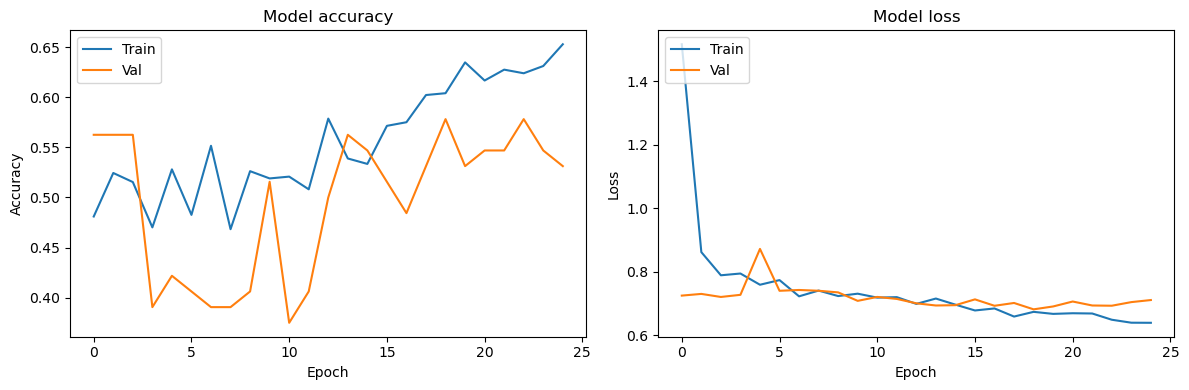

In [56]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.tight_layout()
plt.show()
